# Logistic Regression - Exercise

## Data Dictionary 

In [2]:
# Please import kid.csv, you'll find it in the data folder

Here are the variables that magazine reseller has on each customer from third-party sources:
Household Income (Income; rounded to the nearest $1,000.00)

Gender (IsFemale = 1 if the person is female, 0 otherwise)

Marital Status (IsMarried = 1 if married, 0 otherwise)

College Educated (HasCollege = 1 if has one or more years of college education, 0 otherwise)

Employed in a Profession (IsProfessional = 1 if employed in a profession, 0 otherwise)

Retired (IsRetired = 1 if retired, 0 otherwise)

Not employed (Unemployed = 1 if not employed, 0 otherwise)

Length of Residency in Current City (ResLength; in years)

Dual Income if Married (Dual = 1 if dual income, 0 otherwise)

Children (Minors = 1 if children under 18 are in the household, 0 otherwise)

Home ownership (Own = 1 if own residence, 0 otherwise)

Resident type (House = 1 if the residence is a single-family house, 0 otherwise)

Race (White = 1 if the race is white, 0 otherwise)

Language (English = 1 is the primary language in the household is English, 0 otherwise)

With this dataset, we will be building a binary classification model which will take above inputs as features and predict if the customer will buy the magazine or not. At last, we’ll evaluate our model using the confusion matrix.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [4]:
rcParams.keys()

/Users/bendixhass/opt/anaconda3/envs/nf/lib/python3.6/_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 30
rcParams['lines.linewidth'] = 3
sns.set_style('white')

In [7]:
df = pd.read_csv("data/kid.csv")

In [8]:
df.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [9]:
cols = list(df.columns)
cols2 = []
for i in cols:
    cols2.append(i.replace(" ","_").lower())
    
df.columns = cols2

In [10]:
df.head()

,obs_no.,buy,income,is_female,is_married,has_college,is_professional,is_retired,unemployed,residence_length,dual_income,minors,own,house,white,english,prev_child_mag,prev_parent_mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [11]:
df.drop("obs_no.", inplace=True, axis=1)

In [12]:
df.head()

,buy,income,is_female,is_married,has_college,is_professional,is_retired,unemployed,residence_length,dual_income,minors,own,house,white,english,prev_child_mag,prev_parent_mag
0,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


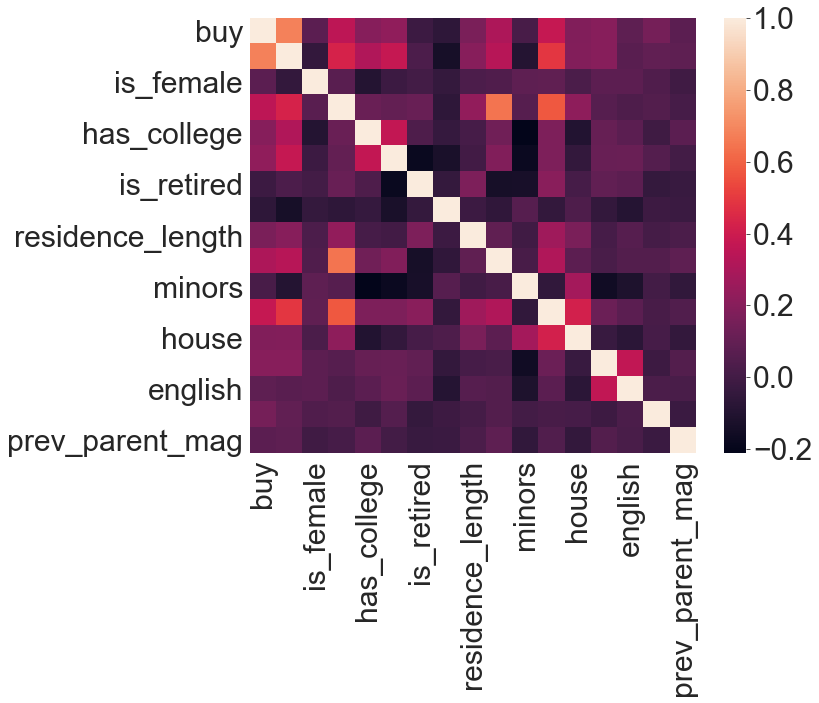

In [13]:
sns.heatmap(df.corr()) 

own = house
college = profession
income = is married & profession
is married = own & dual income

own
is_married
profession

In [14]:
#df.drop(["own","is_married","is_professional"], inplace=True, axis=1)
df.head()

,buy,income,is_female,is_married,has_college,is_professional,is_retired,unemployed,residence_length,dual_income,minors,own,house,white,english,prev_child_mag,prev_parent_mag
0,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [15]:
X = df.iloc[:,1:].values

In [16]:
y = df.iloc[:,0].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [18]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = LogReg.predict(X_test)

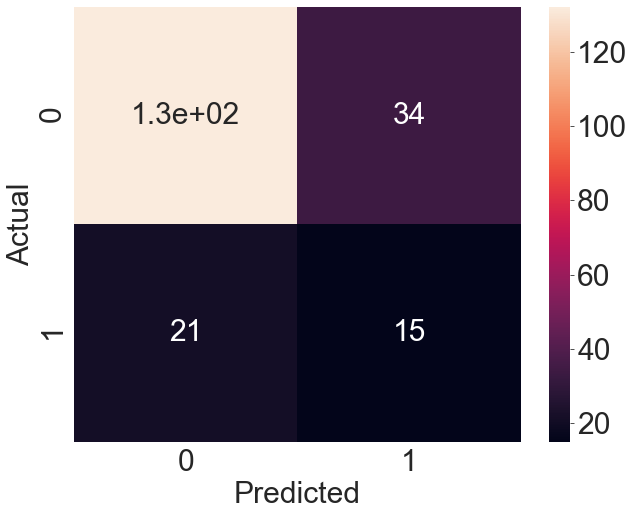

In [20]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       166
           1       0.31      0.42      0.35        36

    accuracy                           0.73       202
   macro avg       0.58      0.61      0.59       202
weighted avg       0.76      0.73      0.74       202



In [22]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [23]:
prob_pred = LogReg.predict_proba(X_test)

In [24]:
precision, recall, thresholds = precision_recall_curve(y_test, prob_pred[:,1] )

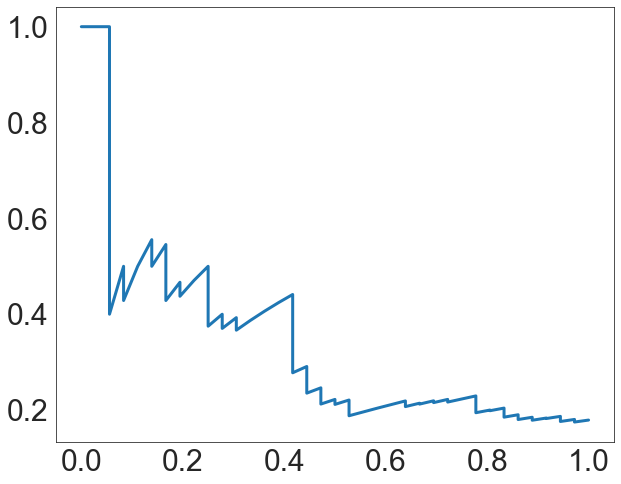

In [25]:
plt.plot(recall, precision)

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, prob_pred[:,1] )

(0, 1)

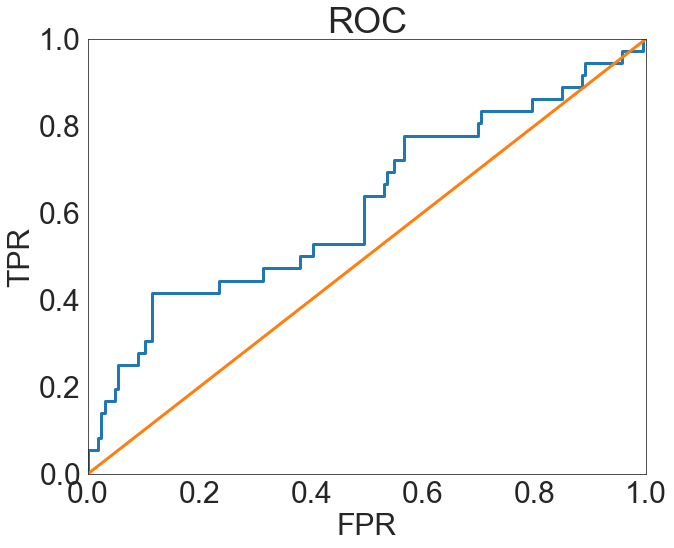

In [27]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.ylim(0,1)
plt.xlim(0,1)

In [28]:
roc_auc_score(y_test, prob_pred[:,1] )

0.6184738955823292

In [29]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [30]:
pol = PolynomialFeatures(degree=2)
scaler = StandardScaler()

In [31]:
X_pol = pol.fit_transform(X)

In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pol, y, test_size = .3, random_state=25)

In [33]:
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [34]:
LogReg2 = LogisticRegression(max_iter=1000)
LogReg2.fit(X_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred2 = LogReg2.predict(X_test2)

In [36]:
y_pred2

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0])

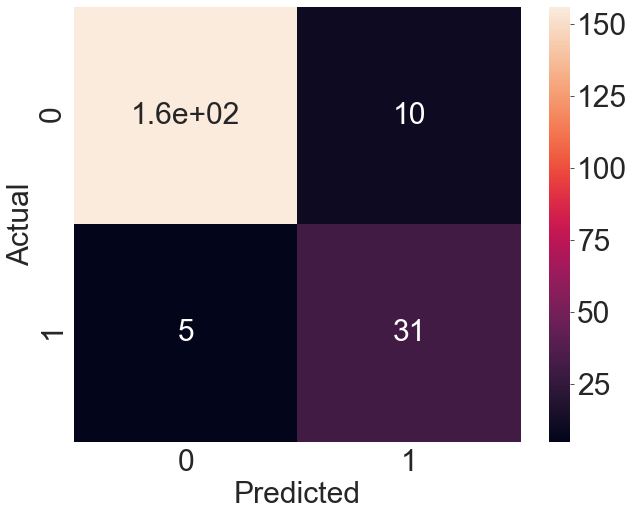

In [37]:
confusion_matrix = pd.crosstab(y_test2, y_pred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [38]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       166
           1       0.76      0.86      0.81        36

    accuracy                           0.93       202
   macro avg       0.86      0.90      0.88       202
weighted avg       0.93      0.93      0.93       202



In [39]:
prob_pred2 = LogReg2.predict_proba(X_test2)

In [40]:
roc_auc_score(y_test2, prob_pred2[:,1] )

0.9608433734939759

In [41]:
fpr2, tpr2, thresholds2 = roc_curve(y_test2, prob_pred2[:,1] )

(0, 1)

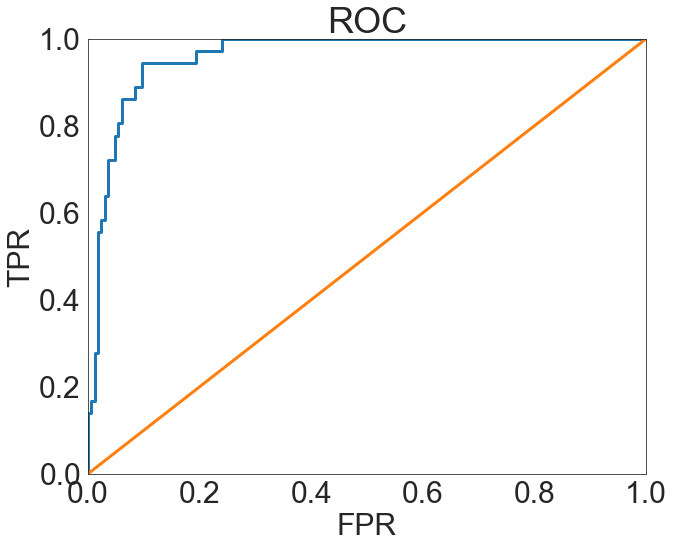

In [42]:
plt.plot(fpr2,tpr2)
plt.plot([0,1],[0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.ylim(0,1)
plt.xlim(0,1)

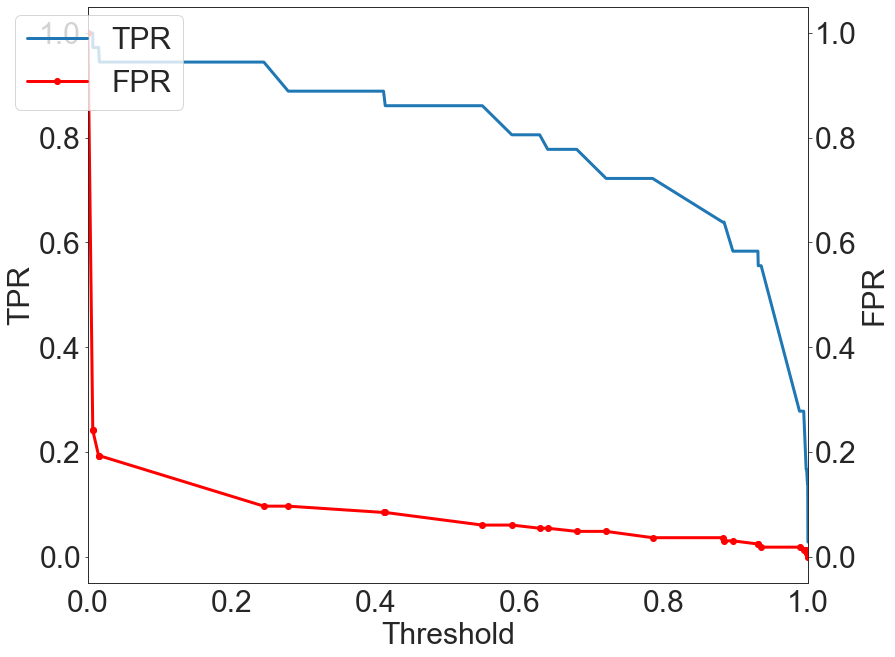

In [49]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])

a1.plot(thresholds2,tpr2)
a1.set_ylabel('TPR')
a1.set_xlabel('Threshold')
a2 = a1.twinx()
a2.plot(thresholds2,fpr2,'ro-')
a2.set_ylabel('FPR')
a1.set_xlim([0, 1])
fig.legend(labels = ('TPR','FPR'),loc='upper left')
plt.show()